<h2> Dataframe that will be used throughout Q1 </h2>

In [1]:
import pandas as pd

# Clusters DataFrame
df_f0f1 = pd.read_csv('f0_f1.csv', sep=',')
move = df_f0f1.pop('trace_id')
insert = df_f0f1.insert(0, 'trace_id', move)

df_f1f2 = pd.read_csv('f1_f2.csv', sep=',')
df_f2f3 = pd.read_csv('f2_f3.csv', sep=',')
df_f3f4 = pd.read_csv('f3_f4.csv', sep=',')
df_f4f5 = pd.read_csv('f4_f5.csv', sep=',')


<h2> TMA Question 1a </h2>
Each cluster is represented by a unique trace ID across all 5 datasets: f0_f1.csv, f1_f2.csv, ..., and f4_f5.csv. To use dataframe to compute the number of unique people for every cluster (trace ID).

In [2]:
import pandas as pd

cluster01 = df_f0f1['trace_id'].nunique() # find unique in cluster01 - output 316

print(f"There is a total of {cluster01} unique clusters") 

cluster_names = df_f0f1.trace_id.unique()

#renaming to merge data
cluster02 = df_f1f2.rename({'f1': 'f0', 'f2': 'f1'}, axis=1)
cluster03 = df_f2f3.rename({'f2': 'f0', 'f3': 'f1'}, axis=1)
cluster04 = df_f3f4.rename({'f3': 'f0', 'f4': 'f1'}, axis=1)
cluster05 = df_f4f5.rename({'f4': 'f0', 'f5': 'f1'}, axis=1)

#merging data
all_cluster = [df_f0f1, cluster02, cluster03, cluster04, cluster05]
all_cluster1 = pd.concat(all_cluster)
all_clusterDF = pd.DataFrame(all_cluster1) # make it into df
display(all_clusterDF)

# Belows shows the unique people for every cluster

all_clusterDF = all_clusterDF.pivot_table(columns=['trace_id'], aggfunc='size') # find size count

unique_peopleDF = all_clusterDF.reset_index() # convert to dataframe

unique_peopleDF.rename({'index':'trace_id',0:'occur'},axis='columns',inplace=True)

# Add 1 to all values in occur column, to include trace person

unique_peopleDF['occur'] += 1 # plus 1 to include original carrier

display(unique_peopleDF)
                

There is a total of 316 unique clusters


,trace_id,f0,f1
0,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000914
1,TRACE_PERSON_0000000019,PERSON_0000000019,PERSON_0000000431
2,TRACE_PERSON_0000000130,PERSON_0000000130,PERSON_0000000318
3,TRACE_PERSON_0000000282,PERSON_0000000282,PERSON_0000000539
4,TRACE_PERSON_0000000296,PERSON_0000000296,PERSON_0000000752
...,...,...,...
129,TRACE_PERSON_0000000652,PERSON_0000000119,PERSON_0000000420
130,TRACE_PERSON_0000000130,PERSON_0000000571,PERSON_0000000853
131,TRACE_PERSON_0000000958,PERSON_0000000729,PERSON_0000000553
132,TRACE_PERSON_0000000958,PERSON_0000000852,PERSON_0000000746


,trace_id,occur
0,TRACE_PERSON_0000000003,17
1,TRACE_PERSON_0000000005,22
2,TRACE_PERSON_0000000011,5
3,TRACE_PERSON_0000000014,2
4,TRACE_PERSON_0000000016,21
...,...,...
311,TRACE_PERSON_0000000993,2
312,TRACE_PERSON_0000000994,13
313,TRACE_PERSON_0000000995,24
314,TRACE_PERSON_0000000998,6


<h2> TMA Question 1b </h2>
Visualize the people count per cluster dataframe outputted by 1a on a histogram with x axis showing the people count and y axis showing the number of clusters having the people count. Analyse the output and share ONE insight which you may draw from the diagram.


,trace_id,occur
0,TRACE_PERSON_0000000504,2
1,TRACE_PERSON_0000000290,2
2,TRACE_PERSON_0000000529,2
3,TRACE_PERSON_0000000665,2
4,TRACE_PERSON_0000000270,2
...,...,...
311,TRACE_PERSON_0000000095,36
312,TRACE_PERSON_0000000851,37
313,TRACE_PERSON_0000000646,38
314,TRACE_PERSON_0000000573,47


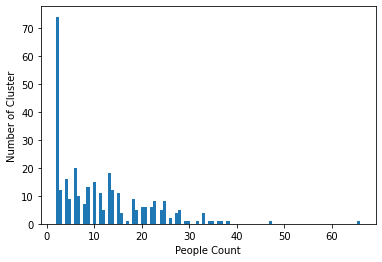

'insight - through this histogram, we can tell that this virus is either not as infectious\nor people are pracitcing social responsibility as most of the clusters consists of only 2 people in it. Infecting\nothers with the virus seems to be low as the people count per cluster is gradually decreasing as shown in the \nhistogram.'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

sortDF = unique_peopleDF.sort_values(by='occur') #sort values based on occur column from small to big
sortDF_toCSV =  sortDF.to_csv('sortDF.csv') # convert to csv to load in as a DF

graphDF = pd.read_csv('sortDF.csv', sep=',') #DF, comma separated
graphDF.pop('Unnamed: 0') # removed unwanted columns, clean up
display(graphDF) # view data to confirm format is right for hist

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(graphDF['occur'],bins=100) #plot hist, bins is 100 
axes1.set_xlabel('People Count')
axes1.set_ylabel('Number of Cluster')

plt.show()


'''insight - through this histogram, we can tell that this virus is either not as infectious
or people are pracitcing social responsibility as most of the clusters consists of only 2 people in it. Infecting
others with the virus seems to be low as the people count per cluster is gradually decreasing as shown in the 
histogram.'''

<h2> TMA Question 1c </h2>
The people.csv contains the population of ALL people under the contact tracing collection. Use dataframe to find all people who are NOT in any cluster (potentially negative or no close contact).

In [5]:
import pandas as pd

peopleDF = pd.read_csv('people.csv', sep=',')

# combine all into one dataframe
data = [df_f0f1['f0'], df_f0f1['f1'], df_f1f2['f2'], df_f2f3['f3'], df_f3f4['f4'], df_f4f5['f5']]
everyone = pd.concat(data, ignore_index=True) # combine everyone into one column
everyoneDF = pd.DataFrame(everyone, columns=['index'])
#remove duplicates and rename column to match peopleDF
cleanDF_everyone = everyoneDF.drop_duplicates()
#print(cleanDF_everyone)

# find the uninfected people
combine = pd.concat([peopleDF, cleanDF_everyone]).drop_duplicates(subset = 'index', keep=False)
uninfected_DF = pd.DataFrame(combine)
display(uninfected_DF) 

# to find total number of uninfected people
display(uninfected_DF.describe()) # There are a total of 48 uninfected people

,index,name
1,PERSON_0000000001,Michael Curry
7,PERSON_0000000007,James Rodriguez
59,PERSON_0000000059,Harold Medina
62,PERSON_0000000062,Bobby Lopez
101,PERSON_0000000101,Connie Morales
142,PERSON_0000000142,Cynthia Middleton
184,PERSON_0000000184,Emma Thompson
199,PERSON_0000000199,Laurie Cooke
228,PERSON_0000000228,Anthony Young
237,PERSON_0000000237,Jamie Barnes


,index,name
count,48,48
unique,48,48
top,PERSON_0000000521,Chad Combs
freq,1,1


<h2> TMA Question 1d </h2>
Use dataframe and design a function which takes a person ID and a trace ID as its parameters and returns a dataframe showing all tracing paths passing through the specified person ID. With the help of this function, it provides information on all people who potentially infected the specified person directly/indirectly and whom were potentially infected by the specified person directly/indirectly.
For example, when calling the function with person ID = PERSON_0000000067 and trace ID = TRACE_PERSON_0000000379, a sample of the returned dataframe is showed in Figure 1 below.

In [6]:
import pandas as pd

def trace():
    traceID = input("What is the person's trace ID?")   # takes in the parameter of trace ID
    personID = input("What is the person ID?")    # takes in the parameter of person ID
    
    #combine data 
    # merge df and removing unwanted columns
    join_f0tof1 = pd.merge(df_f0f1, df_f1f2, on='f1', how='inner') 
    join_f0tof1.pop('trace_id_y')

    join_f2tof3 = pd.merge(join_f0tof1, df_f2f3, on='f2', how='inner')
    join_f2tof3.pop('trace_id')

    join_f3tof4 = pd.merge(join_f2tof3, df_f3f4, on='f3', how='inner') 
    join_f3tof4.pop('trace_id')

    join_f4tof5 = pd.merge(join_f3tof4, df_f4f5, on='f4', how='inner') 
    join_f4tof5.pop('trace_id') 
    
    filtering = join_f4tof5[join_f4tof5['trace_id_x'].str.contains(traceID)].drop_duplicates() # remove duplicated rows
    filtering = filtering[(filtering['f1']==personID) | (filtering['f2']==personID) | (filtering['f3']==personID) | (filtering['f4']==personID) | (filtering['f5']==personID)] # match with user input
    filtering.pop('trace_id_x')
    filtering = filtering.reset_index()
    filtering.pop('index')
    return filtering

    # if you do a display(filtering), the output will be correct.
#trace()   # removed cause of question 1f, output will be displayed in 1f

<h2> TMA Question 1e </h2>
Use dataframe and design a function which takes in 3 inputs: a trace ID, a “from” person
ID and a “to” person ID, and returns all tracing paths starting from the “from” person ID
and ending at the “to” person ID in the specified cluster by the trace ID. In other words,
the function answers whether the “from” person infected directly/indirectly the “to”
person in the specified cluster.
Direct relationship: there is a direct edge to connect the two persons, for example, A <-> B.
Indirect relationship: To connect a person A to a person C, it goes through a non-empty set of persons, for example, A <-> B1 <-> B2 ... <-> C.

In [8]:
def find_relationship():
    trace_ID = input("What is the person's trace ID?")  
    from_who = input("From") 
    to_who = input("To")
    
    #combine clusters - doing again so as to not touch the previous data set
    # merge df and removing unwanted columns
    join_f0tof1_ = pd.merge(df_f0f1, df_f1f2, on='f1', how='inner')
    join_f0tof1_.pop('trace_id_y')

    join_f2tof3_ = pd.merge(join_f0tof1_, df_f2f3, on='f2', how='inner') 
    join_f2tof3_.pop('trace_id')

    join_f3tof4_ = pd.merge(join_f2tof3_, df_f3f4, on='f3', how='inner')
    join_f3tof4_.pop('trace_id')
    join_f4tof5_ = pd.merge(join_f3tof4_, df_f4f5, on='f4', how='inner')
    join_f4tof5_.pop('trace_id')

    #display(join_f4tof5_) # checking purposes
    
    findTraceID = join_f4tof5_[join_f4tof5_['trace_id_x'].str.contains(trace_ID)].drop_duplicates() # remove dups
    query1 = findTraceID[findTraceID.isin([from_who]).any(axis=1)] # filter out data based on from input
    query2 = query1[query1.isin([to_who]).any(axis=1)] # further filtering based on to input
    display(query2) 
    
    convert_query2_toList = query2.values.tolist() # convert to list to print out
    
    count = 0
    for i in convert_query2_toList:
        index = i.index(from_who) # find from who index in data
        index2 = i.index(to_who) # find to who index in data
        diff = index2 - index
        if diff > 1: # more than 1 means indirect
            newstr = " "
            newstr = newstr.join(convert_query2_toList[count][index:index2+1])
            print(f"Indirect Relationship : {newstr}")
            count+=1
        elif diff == 1: # 1 means direct
            print(f"Direct Relationship : {convert_query2_toList[count][index]} {convert_query2_toList[count][index2]}")
            count+=1

                
find_relationship()

What is the person's trace ID? TRACE_PERSON_0000000379
From PERSON_0000000379
To PERSON_0000000067


,trace_id_x,f0,f1,f2,f3,f4,f5
457,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
469,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1077,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
1078,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456
1085,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
1086,TRACE_PERSON_0000000379,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456


Indirect Relationship : PERSON_0000000379 PERSON_0000000218 PERSON_0000000054 PERSON_0000000889 PERSON_0000000640 PERSON_0000000067
Indirect Relationship : PERSON_0000000379 PERSON_0000000740 PERSON_0000000054 PERSON_0000000889 PERSON_0000000640 PERSON_0000000067
Indirect Relationship : PERSON_0000000379 PERSON_0000000218 PERSON_0000000054 PERSON_0000000889 PERSON_0000000067
Indirect Relationship : PERSON_0000000379 PERSON_0000000218 PERSON_0000000054 PERSON_0000000889 PERSON_0000000067
Indirect Relationship : PERSON_0000000379 PERSON_0000000740 PERSON_0000000054 PERSON_0000000889 PERSON_0000000067
Indirect Relationship : PERSON_0000000379 PERSON_0000000740 PERSON_0000000054 PERSON_0000000889 PERSON_0000000067


<h2> TMA Question 1f </h2>
Apply/Call the function defined in Q1(d)(i) with the following parameters: person ID = PERSON_0000000067 and trace ID = TRACE_PERSON_0000000379. Then follow the steps in the link (https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial) to use networkx to visualize the returned cluster (sample diagram is showed in Figure 2)

What is the person's trace ID? TRACE_PERSON_0000000379
What is the person ID? PERSON_0000000067


,node1 - f0,node2 - f1,node3 - f2,node4 - f3,node5 - f4,node6 - f5
0,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
2,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
3,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456
4,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
5,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456


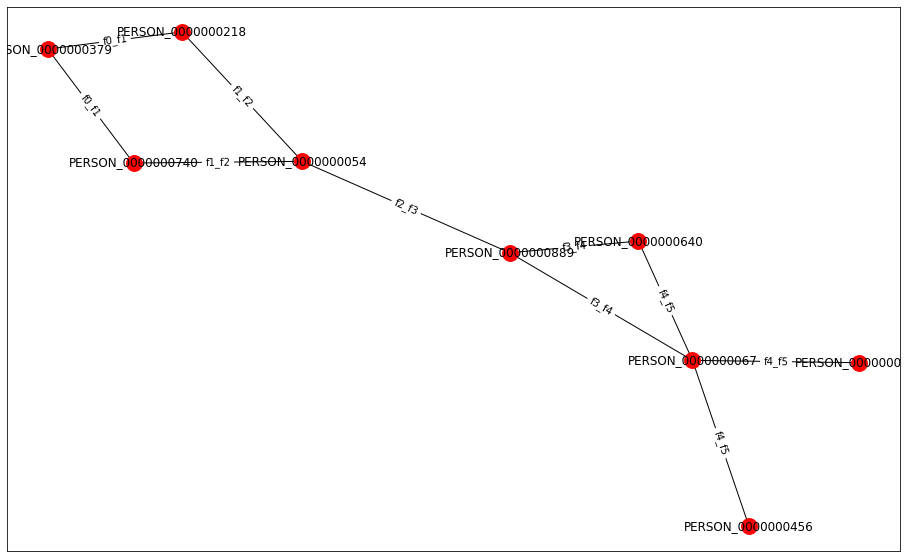

In [9]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# person ID = PERSON_0000000067 and trace ID = TRACE_PERSON_0000000379
call = trace()

_1f_df = call.to_csv('1f_df.csv', sep = ',')    # output the result in 1d into a new csv, this changes everytime this code is run

nodes_list = pd.read_csv('1f_df.csv')        # read csv that we just created
nodes_list.pop('Unnamed: 0')   # cleaning up, duplicated columns
nodes_list = nodes_list.rename({'f0': 'node1 - f0', 'f1': 'node2 - f1', 'f2': 'node3 - f2', 'f3': 'node4 - f3', 'f4': 'node5 - f4', 'f5': 'node6 - f5'}, axis=1) # rename for easier ref, additional step

display(nodes_list) # display to check

col = list(nodes_list.columns.values) # retrieve columns name only
g = nx.Graph() # create networkx graph
plt.figure(figsize=(16, 10)) 
b = 0
c = 1

for i in range(len(col)-1):  # retrieve and add edges, removing duplicates
    a = f"f{b}_f{c}"
    g.add_edges_from(zip(nodes_list[col[i]], nodes_list[col[i+1]]), edge_labels = a)
    b+=1
    c+=1

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True,node_size = 250, node_color = 'r')
nx.draw_networkx_edge_labels(g, pos,edge_labels=nx.get_edge_attributes(g,'edge_labels'))
#nx.draw_networkx(g, pos = nx.spring_layout(g, weight = None), with_labels=True, node_size=250, node_color='r')
#nx.draw_networkx_edge_labels(g, pos = nx.spring_layout(g), edge_labels = edge_labels)

#pos=nx.spring_layout(g)

plt.show()


<h2> TMA Question 2a </h2>
Use sqlalchemy ORM to define and store data of 2 entities Person and Acquaintance, which can be loaded from people.csv and acquaintance.csv correspondingly. Note to define the correct relationship between the 2 entities.

In [12]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Enum, Float, ForeignKey

from sqlalchemy.orm import relationship

Base = declarative_base() # declare base

class People(Base): # class people - parent
    __tablename__ = 'people'
    
    index = Column(String(50), primary_key=True)
    name = Column(String(50))
    
    def __repr__(self): # print out msg
        return "%s %s" %(self.index, self.name)
    
    
class Acquaintance(Base): # class acquaintance - children
    __tablename__ = 'acquaintance'
    
    indexing = Column('ID', Integer, primary_key=True)
    fromwho = Column(String, ForeignKey("people.index"))
    towho = Column(String, ForeignKey("people.index"))
    rlsfromwho = relationship("People", foreign_keys="Acquaintance.fromwho")
    
    def __repr__(self): # print out msg
        return "%s %s %s" %(self.indexing, self.fromwho, self.towho)
    

In [13]:
from sqlalchemy import create_engine
# create engine - and db
engine = create_engine('sqlite:///TMAQ2.db', echo=True)
Base.metadata.create_all(engine)

2022-03-13 18:56:02,101 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2022-03-13 18:56:02,102 INFO sqlalchemy.engine.base.Engine ()
2022-03-13 18:56:02,104 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2022-03-13 18:56:02,104 INFO sqlalchemy.engine.base.Engine ()
2022-03-13 18:56:02,142 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("people")
2022-03-13 18:56:02,143 INFO sqlalchemy.engine.base.Engine ()
2022-03-13 18:56:02,169 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("people")
2022-03-13 18:56:02,170 INFO sqlalchemy.engine.base.Engine ()
2022-03-13 18:56:02,171 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("acquaintance")
2022-03-13 18:56:02,172 INFO sqlalchemy.engine.base.Engine ()
2022-03-13 18:56:02,173 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("acquaintance")
2022-03-13 18:56:02,174 INFO sqlalchemy.engine.base.Engine ()
2022-03-13

In [14]:
from sqlalchemy.orm import sessionmaker
# bind session to engine, db we created
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
import csv

# open both csv file, read and add to session. After which will be loaded to db.
with open('people.csv') as f:
    reader = csv.reader(f)
    header = next(reader)

    for row in reader:
        people_item = People(
            index = str(row[0]), # assigned based on format of both csv files
            name = row[1]
        )
        
        session.add(people_item) # add to session
        
        session.commit()

with open('acquaintance.csv') as t:
    reader1 = csv.reader(t)
    header = next(reader1)
    for row in reader1:
        acquaintance_item = Acquaintance(
            fromwho = str(row[0]),
            towho = row[1]
        )
        
        session.add(acquaintance_item) # add to session

        session.commit()
        


2022-03-13 18:56:05,190 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2022-03-13 18:56:05,193 INFO sqlalchemy.engine.base.Engine INSERT INTO people ("index", name) VALUES (?, ?)
2022-03-13 18:56:05,193 INFO sqlalchemy.engine.base.Engine ('PERSON_0000000000', 'Amy Berger')
2022-03-13 18:56:05,257 INFO sqlalchemy.engine.base.Engine COMMIT
2022-03-13 18:56:05,311 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2022-03-13 18:56:05,313 INFO sqlalchemy.engine.base.Engine INSERT INTO people ("index", name) VALUES (?, ?)
2022-03-13 18:56:05,314 INFO sqlalchemy.engine.base.Engine ('PERSON_0000000001', 'Michael Curry')
2022-03-13 18:56:05,362 INFO sqlalchemy.engine.base.Engine COMMIT
2022-03-13 18:56:05,412 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2022-03-13 18:56:05,413 INFO sqlalchemy.engine.base.Engine INSERT INTO people ("index", name) VALUES (?, ?)
2022-03-13 18:56:05,414 INFO sqlalchemy.engine.base.Engine ('PERSON_0000000002', 'Robert Ramirez')
2022-03-13 18:56:05,465 

<h2> Question 2b </h2>

Compose necessary queries and define a function which takes a person ID as its parameter and implement the function using sqlalchemy ORM to find all direct acquaintances' names of the given person ID.
 Direct relationship: there is a direct edge to connect the two persons, for example, A <-> B in the acquaintance.csv.

In [11]:
from sqlalchemy import and_

def findFriends():
    person__ID = input("Please input person ID to find friends: ") # user input to look for acquaintances
    
    result = session.query(Acquaintance).filter(Acquaintance.fromwho == person__ID).all() # filter based on fromwho, and get back all results
    friends = []
    for r in result:
        #print(r)
        result2 = session.query(People).filter(People.index == r.towho) # double filter again with the previously filtered result, get the friends = 'towho'
        for rr in result2:
            friends.append(rr) # append for nicer printing
    print(f"Friend is {friends}")
findFriends()

Please input person ID to find friends:  PERSON_0000000060


NameError: name 'session' is not defined

<h2> Question 2c i </h2>
(i) Use sqlalchemy ORM to count the number of acquaintances per person.

In [128]:
from sqlalchemy import func

sample_query = session.query(func.count('*'), Acquaintance.fromwho).\ # use func.count to count all the acquaintances
    group_by(Acquaintance.fromwho).\ # group by the person id under from who
    having(func.count('*') > 1).\
    all()
for i, b in sample_query:
    print(f" ID : {b} has {i} acquaintances") # printing in a formated way

2022-03-14 02:34:58,842 INFO sqlalchemy.engine.Engine SELECT count(?) AS count_1, acquaintance.fromwho AS acquaintance_fromwho 
FROM acquaintance GROUP BY acquaintance.fromwho 
HAVING count(?) > ?
2022-03-14 02:34:58,843 INFO sqlalchemy.engine.Engine [generated in 0.00085s] ('*', '*', 1)
 ID : PERSON_0000000000 has 14 acquaintances
 ID : PERSON_0000000001 has 12 acquaintances
 ID : PERSON_0000000002 has 18 acquaintances
 ID : PERSON_0000000003 has 13 acquaintances
 ID : PERSON_0000000004 has 19 acquaintances
 ID : PERSON_0000000005 has 23 acquaintances
 ID : PERSON_0000000006 has 22 acquaintances
 ID : PERSON_0000000007 has 15 acquaintances
 ID : PERSON_0000000008 has 17 acquaintances
 ID : PERSON_0000000009 has 14 acquaintances
 ID : PERSON_0000000010 has 16 acquaintances
 ID : PERSON_0000000011 has 27 acquaintances
 ID : PERSON_0000000012 has 18 acquaintances
 ID : PERSON_0000000013 has 24 acquaintances
 ID : PERSON_0000000014 has 14 acquaintances
 ID : PERSON_0000000015 has 21 acqua

<h2> Question 2c ii </h2>
(ii) Draw a boxplot to display the data distribution of the number of acquaintances per person.

,0,1
0,14,PERSON_0000000000
1,12,PERSON_0000000001
2,18,PERSON_0000000002
3,13,PERSON_0000000003
4,19,PERSON_0000000004
...,...,...
995,20,PERSON_0000000995
996,17,PERSON_0000000996
997,18,PERSON_0000000997
998,14,PERSON_0000000998


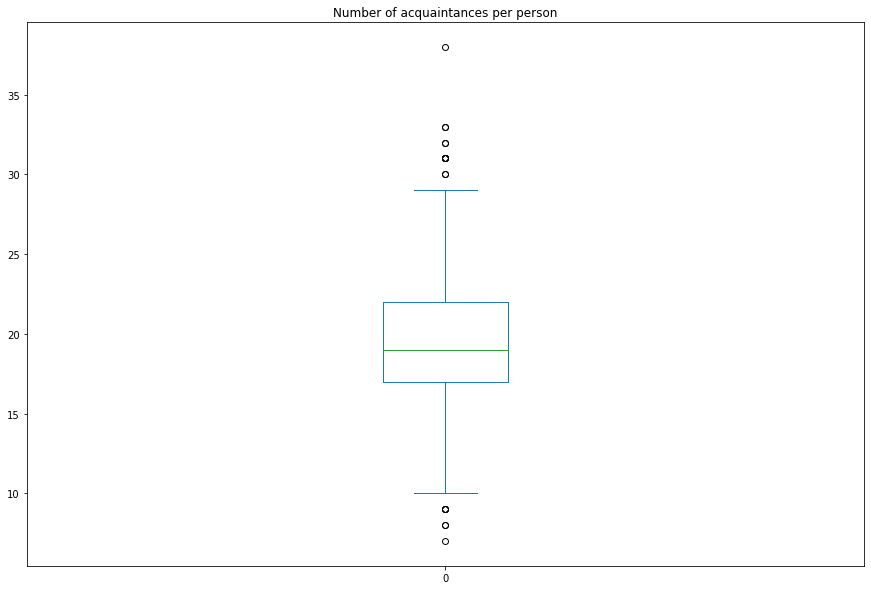

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# convert sample_query to df
boxplotDF = pd.DataFrame(sample_query) # convert into dataframe for this boxplot question

display(boxplotDF)
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1) # only 1 plot is needed
boxplot = boxplotDF[0].plot(kind='box', title='Number of acquaintances per person', figsize=(15,10)) # plot using column 0 which contains of the acquaintance count per person ID - as retrieved from c (i)


boxplot.plot()

plt.show()

<h2> Question 2d </h2>
Use sqlalchemy ORM to find the names of people that having the most number of acquaintances.

In [130]:
from sqlalchemy import func

sample_query = session.query(func.count('*'), Acquaintance.fromwho).\
    group_by(Acquaintance.fromwho).\
    order_by(func.count('*').desc()) # copy the variable sample_query again

for i, t in sample_query: # loop into sample query to get the names of the person with most friends
    nameofT = session.query(Acquaintance).filter(Acquaintance.fromwho == t) # first filter based on fromwho
    nameofT_02 = session.query(People).filter(People.index == t) # now getting the name
    for nameofperson in nameofT_02:
        print(f"{nameofperson} has the most acquantainces, at {i} count")
    break


2022-03-14 02:35:07,861 INFO sqlalchemy.engine.Engine SELECT count(?) AS count_1, acquaintance.fromwho AS acquaintance_fromwho 
FROM acquaintance GROUP BY acquaintance.fromwho ORDER BY count(?) DESC
2022-03-14 02:35:07,861 INFO sqlalchemy.engine.Engine [generated in 0.00061s] ('*', '*')
2022-03-14 02:35:07,872 INFO sqlalchemy.engine.Engine SELECT people."index" AS people_index, people.name AS people_name 
FROM people 
WHERE people."index" = ?
2022-03-14 02:35:07,873 INFO sqlalchemy.engine.Engine [cached since 13.54s ago] ('PERSON_0000000120',)
PERSON_0000000120 George Anderson has the most acquantainces, at 38 count


<h2> Question 2e </h2>
Use sqlalchemy ORM to find all groups of THREE (3) distinct people who all know each other.

In [151]:
categories = session.query(Acquaintance.fromwho).filter(Acquaintance.fromwho.in_([Acquaintance.fromwho])).group_by(Acquaintance.towho).having(func.count(Acquaintance.towho) > 1).all()

#for s in categories:
    #print(s)
    
#test = session.query(Acquaintance).filter(Acquaintance.fromwho)

x = session.query(Acquaintance).filter(Acquaintance.fromwho).all()

for frompeople in x:
    topeople = session.query(Acquaintance.towho).filter(People.index == frompeople.fromwho)
    print(topeople)
    break

2022-03-14 00:36:32,203 INFO sqlalchemy.engine.Engine SELECT acquaintance."ID" AS "acquaintance_ID", acquaintance.fromwho AS acquaintance_fromwho, acquaintance.towho AS acquaintance_towho 
FROM acquaintance 
WHERE acquaintance.fromwho
2022-03-14 00:36:32,204 INFO sqlalchemy.engine.Engine [cached since 78.88s ago] ()
